# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [36]:
# import all necessary packages 

import pandas as pd
import re
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# for min/max scaling
from sklearn.preprocessing import MinMaxScaler

# for machine learning data prep
from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs


# download the data

In [37]:
# read in data into dataframe

beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'
breweries_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/brewery_cleaned.csv'

# visualize the data as data frame
beer_df = pd.read_csv(beer_url)
breweries_df = pd.read_csv(breweries_url)
beer_df.head(20)

,abv,ibu,beer_id,beer_name,style,style_group,ounces,brewery_id
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),American Pale Ale (APA),12.0,177
1,0.099,92.0,1036,Lower De Boom,American Barleywine,other,8.4,368
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,other,12.0,368
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),American Pale Ale (APA),12.0,368
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,Fruit / Vegetable Beer,12.0,368
5,0.049,17.0,800,21st Amendment Watermelon Wheat Beer (2006),Fruit / Vegetable Beer,Fruit / Vegetable Beer,12.0,368
6,0.070,70.0,799,21st Amendment IPA (2006),American IPA,American IPA,12.0,368
7,0.070,70.0,797,Brew Free! or Die IPA (2008),American IPA,American IPA,12.0,368
8,0.070,70.0,796,Brew Free! or Die IPA (2009),American IPA,American IPA,12.0,368
9,0.085,52.0,531,Special Edition: Allies Win The War!,English Strong Ale,other,12.0,368


In [38]:
unique_beer_name = beer_df.beer_name.unique()
print('Unique beer_names:', unique_beer_name)
print('# of Unique beer_names:', len(unique_beer_name))

Unique beer_names: ['Bitter Bitch' 'Lower De Boom' 'Fireside Chat' ... 'Worthy Pale'
 'Belgorado' 'Silverback Pale Ale']
# of Unique beer_names: 1326


In [39]:
unique_style_groups = beer_df.style_group.unique()
print('Unique styles:', unique_style_groups)
print('# of Unique styles:', len(unique_style_groups))

Unique styles: ['American Pale Ale (APA)' 'other' 'Fruit / Vegetable Beer' 'American IPA'
 'American Double / Imperial IPA' 'American Blonde Ale'
 'American Pale Wheat Ale' 'Kölsch' 'American Brown Ale'
 'American Amber / Red Ale' 'American Porter']
# of Unique styles: 11


In [40]:
# split the data into abv, ibu, beer_name, and style as float values

abv_flt = beer_df['abv'].astype(float)
ibu_flt = beer_df['ibu'].astype(float)

# look at organization of data
print('abv_flt:', abv_flt) 
print('ibu_flt:', ibu_flt)

print(max(ibu_flt))

abv_flt: 0       0.061
1       0.099
2       0.079
3       0.044
4       0.049
        ...  
1321    0.077
1322    0.069
1323    0.060
1324    0.067
1325    0.055
Name: abv, Length: 1326, dtype: float64
ibu_flt: 0       60.0
1       92.0
2       45.0
3       42.0
4       17.0
        ... 
1321    30.0
1322    69.0
1323    50.0
1324    45.0
1325    40.0
Name: ibu, Length: 1326, dtype: float64
138.0


In [41]:
# encode the styles list text --> numeric values

# def unique(list):

#     list_set = set(list)

#     unique_list = (list(list_set))
    
styles = list(beer_df['style_group'])

styleDict = beer_df['style_group'].to_dict()

styles_set = set(styles)
stylesList = list(styles_set)
# stylesDict = dict(stylesList)

print(stylesList)

# classList = []

# for beer in styleDict.values():
#     for i in range(11):
#         if beer == stylesList[i]:
#             classList.append(i)
        
    # for i, style in enumerate(stylesList):
    #     if beer['styles'] == style:
    #         classList.append(i)

# print(classList)

['American Pale Ale (APA)', 'American IPA', 'American Blonde Ale', 'American Brown Ale', 'American Double / Imperial IPA', 'American Amber / Red Ale', 'American Porter', 'other', 'Kölsch', 'American Pale Wheat Ale', 'Fruit / Vegetable Beer']


In [42]:
whos

Variable                  Type         Data/Info
------------------------------------------------
KernelPCA                 type         <class 'sklearn.decomposi<...>n._kernel_pca.KernelPCA'>
Kernel_pca                KernelPCA    KernelPCA(kernel='rbf', n_components=2)
MinMaxScaler              type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
PCA                       ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
X_KPCA                    ndarray      1326x2: 2652 elems, type `float64`, 21216 bytes
X_PCA                     ndarray      1326x2: 2652 elems, type `float64`, 21216 bytes
X_feat                    ndarray      1326x2: 2652 elems, type `float64`, 21216 bytes
abv_flt                   Series       0       0.061\n1       0.<...>gth: 1326, dtype: float64
abv_flt_array             ndarray      1326: 1326 elems, type `float64`, 10608 bytes
abv_flt_minmax            ndarray      1326x1: 1326 elems, type `float64`, 10608 bytes
abv_flt_minmax_reshaped  

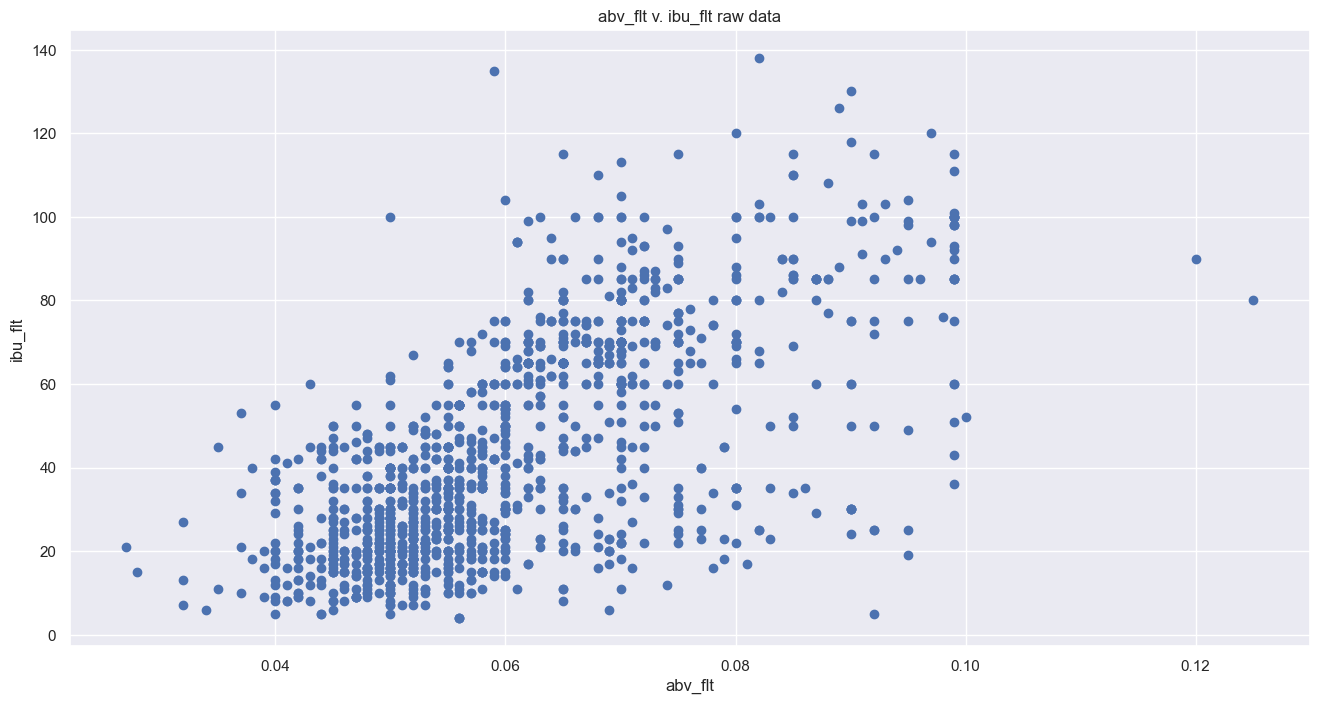

In [43]:
# plot the raw abv and ibut data
plt.figure(figsize=(16,8))
plt.scatter(
    x = abv_flt, 
    y = ibu_flt)
plt.title('abv_flt v. ibu_flt raw data')
plt.xlabel('abv_flt')
plt.ylabel('ibu_flt')
plt.show()

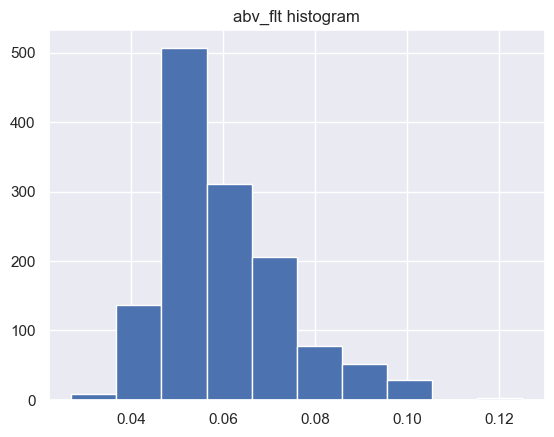

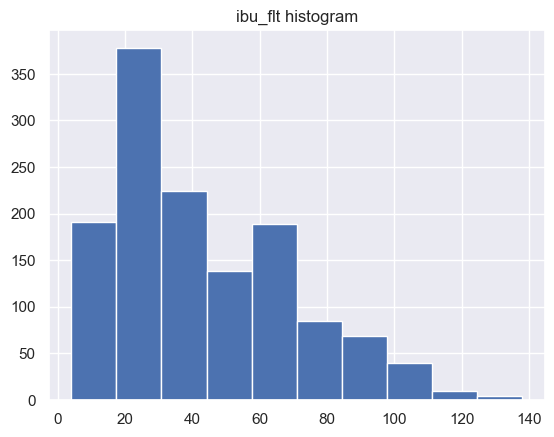

In [44]:
# look at the histogram of the abv_flt and ibu_flt data
abv_flt.hist()
plt.title('abv_flt histogram')
plt.show()
ibu_flt.hist()
plt.title('ibu_flt histogram')
plt.show()


From the scatter plot of the raw data, and the histograms it is evident that the abv data is very collected in a very small range. In order to distinguish the data, min-max scaling will be used.

REASON: Features with higher ranging numbers contribute more to distance metrics hence the decision of the ML algorithms will be influenced more by the high magnitude features. 

In [45]:
# use min-max scaling to separate the abv data
# y = (x – min) / (max – min)

abv_flt_array = abv_flt.to_numpy()
abv_flt_reshaped = abv_flt_array.reshape(-1, 1)
#abv_flt_minmax = MinMaxScaler(feature_range=(0, 138.0)).fit_transform(abv_flt_reshaped) <---------
abv_flt_minmax = MinMaxScaler().fit_transform(abv_flt_reshaped)

ibu_flt_array = ibu_flt.to_numpy()
ibu_flt_reshaped = ibu_flt_array.reshape(-1, 1)
ibu_flt_minmax = MinMaxScaler().fit_transform(ibu_flt_reshaped)

# colors = []
# i = 0
# for val in abv_flt_minmax:
#     colors.append(i)
#     if i > 9:
#         i = 0
#     else:
#         i += 1

# print(colors)
colors = []

for beer in styleDict.values():
    for i in range(11):
        if beer == stylesList[i]:
            colors.append(i)


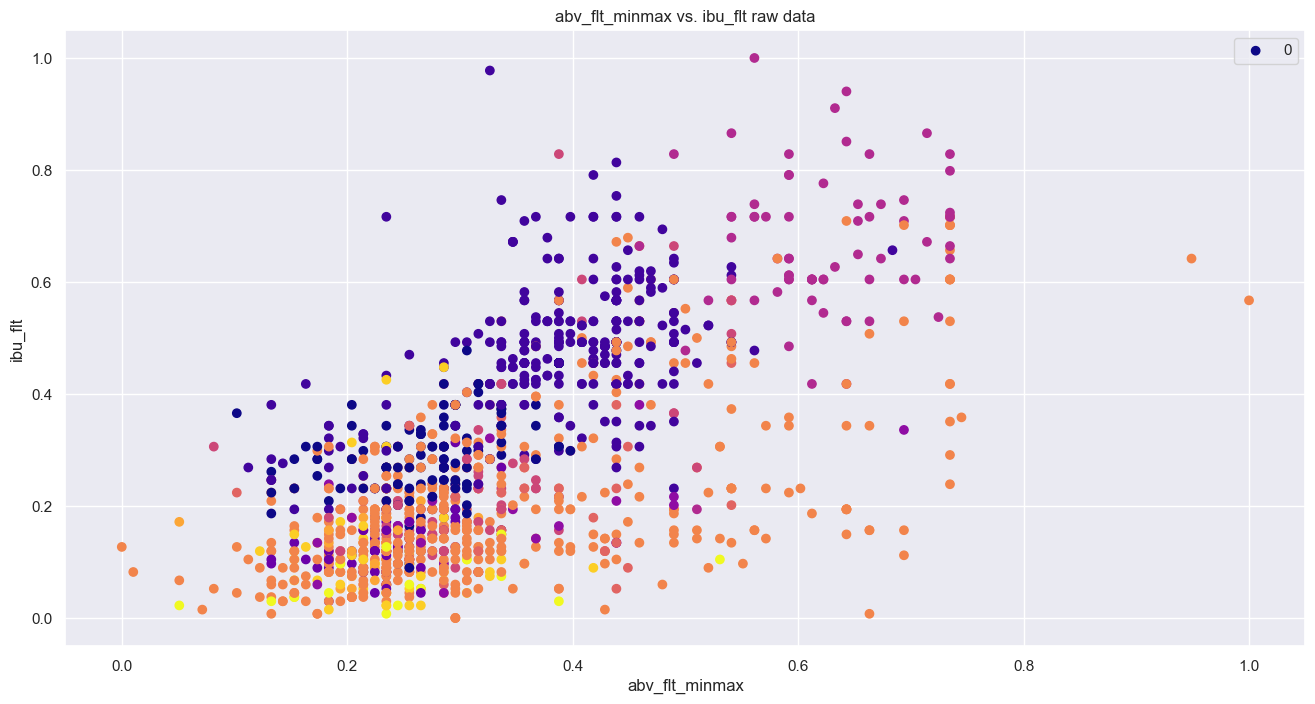

In [64]:
#plt.scatter(x=abv_flt_minmax, y=ibu_flt, cmap='viridis') <-----------
plt.figure(figsize=(16,8))
plt.scatter(x=abv_flt_minmax, y=ibu_flt_minmax, c=colors, cmap='plasma')
plt.title('abv_flt_minmax vs. ibu_flt raw data')
plt.xlabel('abv_flt_minmax')
plt.ylabel('ibu_flt')
plt.legend(colors)

In [47]:
# Try  standard scaler
# from sklearn.preprocessing import StandardScaler
# StandardScaler()

In [48]:
# Try assign colors to data points in scatter plot
# Try K means and Gaussian Mixture models 

In [49]:
#Create a dataframe 
abv_flt_minmax_reshaped = abv_flt_minmax.reshape(1,-1)
ibu_flt_minmax_reshaped = ibu_flt_minmax.reshape(1,-1)
df_scaled = pd.DataFrame({'abv': abv_flt_minmax_reshaped[0],'ibu': ibu_flt_minmax_reshaped[0]})
df_scaled.head()

,abv,ibu
0,0.346939,0.417910
1,0.734694,0.656716
2,0.530612,0.305970
3,0.173469,0.283582
4,0.224490,0.097015


In [50]:
from sklearn.decomposition import PCA

#Extracting features from the df_scaled dataframe
X_feat = df_scaled.iloc[:, :].values
print('X_feat:', X_feat)
# initialize the PCA object
pca = PCA(n_components = 2) # extracts 2 features [maintain same dimension] use 1 to reduce dimension
# transform and fit the feature of the training set
X_PCA = pca.fit_transform(X_feat)
print('X_PCA:', X_PCA)

X_feat: [[0.34693878 0.41791045]
 [0.73469388 0.65671642]
 [0.53061224 0.30597015]
 ...
 [0.33673469 0.34328358]
 [0.40816327 0.30597015]
 [0.28571429 0.26865672]]
X_PCA: [[ 0.11262485 -0.05910362]
 [ 0.51868768  0.14704023]
 [ 0.11298815  0.15599273]
 ...
 [ 0.04364071 -0.02886324]
 [ 0.04908692  0.05153995]
 [-0.04664384 -0.03344045]]


C:\Users\marcu\AppData\Local\Temp\ipykernel_18380\1077479531.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1], cmap='viridis')


Text(0, 0.5, 'PCA dim 2')

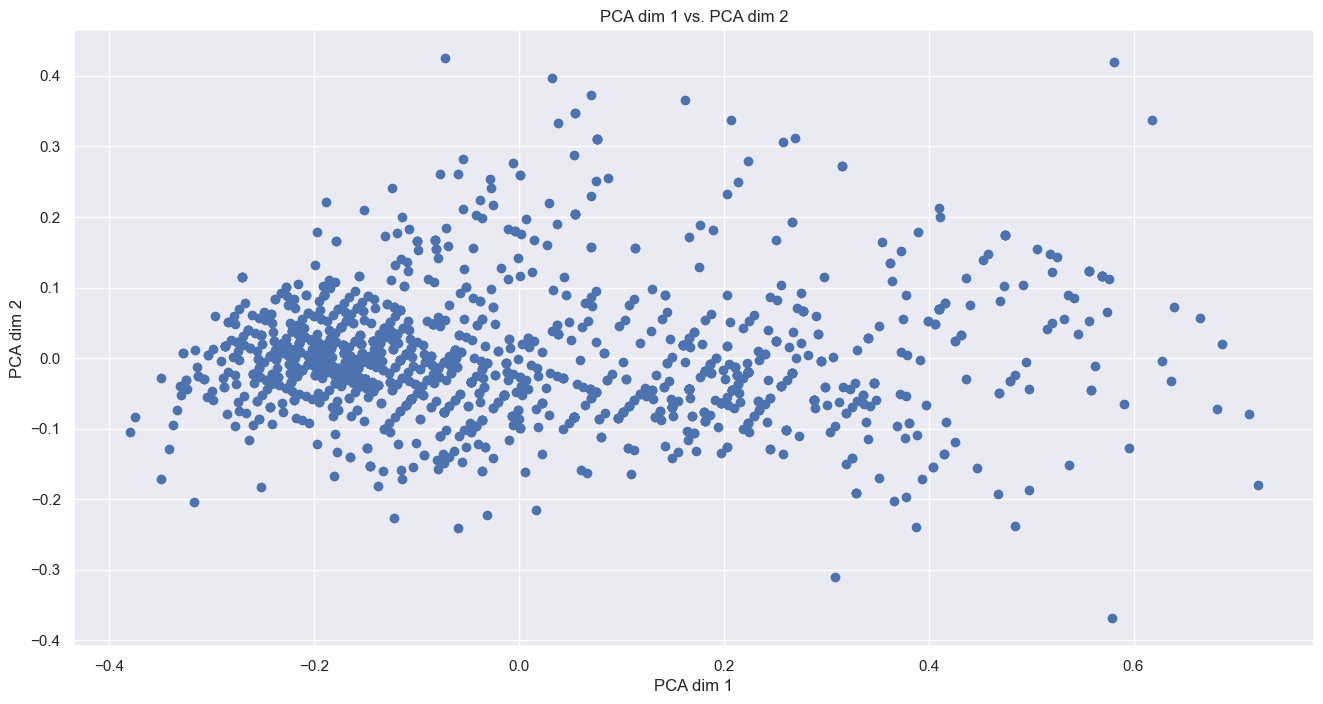

In [51]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1], cmap='viridis')
plt.title('PCA dim 1 vs. PCA dim 2')
plt.xlabel('PCA dim 1')
plt.ylabel('PCA dim 2')

In [52]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf") # extracts 2 features, specify the kernel as rbf, polinomial, linear, or sigmoid
# transform and fit the feature of the training set
X_KPCA = Kernel_pca.fit_transform(X_feat)

C:\Users\marcu\AppData\Local\Temp\ipykernel_18380\1078219184.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X_KPCA[:,0], y=X_KPCA[:,1], cmap='viridis')


Text(0, 0.5, 'KPCA dim 2')

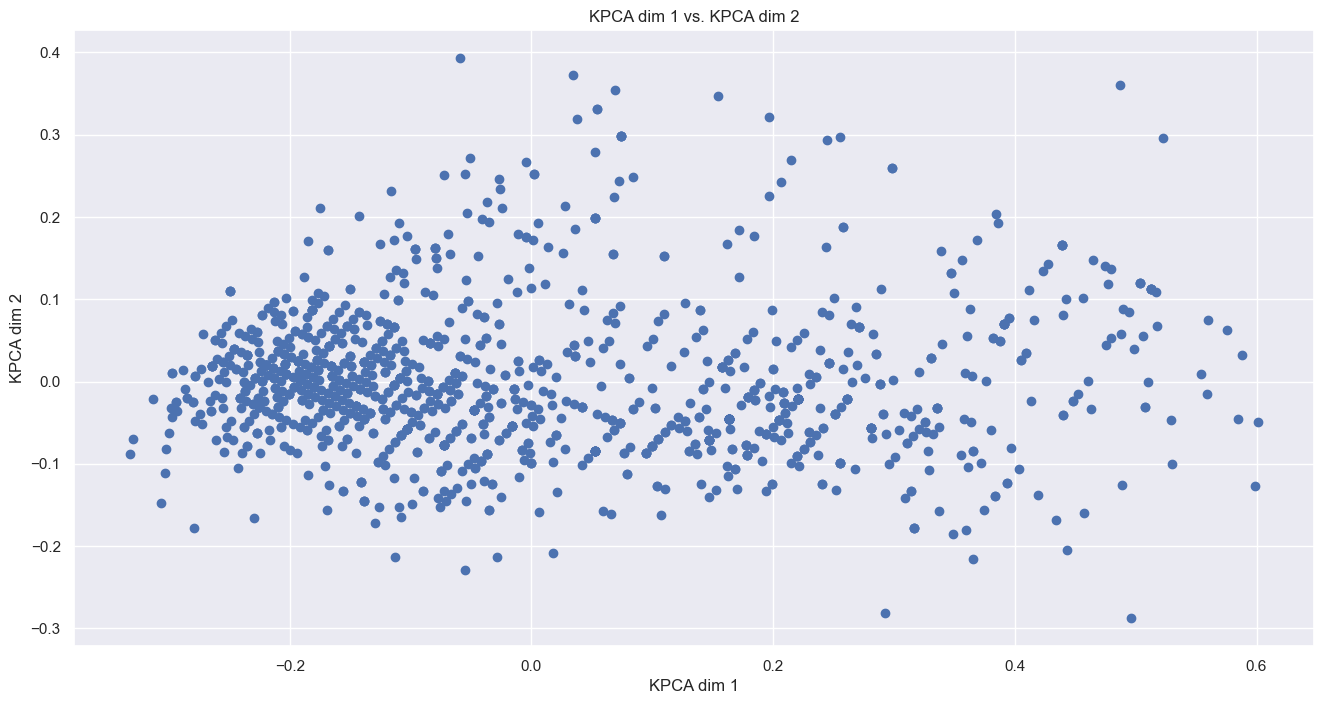

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_KPCA[:,0], y=X_KPCA[:,1], cmap='viridis')
plt.title('KPCA dim 1 vs. KPCA dim 2')
plt.xlabel('KPCA dim 1')
plt.ylabel('KPCA dim 2')

In [54]:
# split the data into training and testing sets

#abv_train, abv_test, ibu_train, ibu_test, beer_name_train, beer_name_test, style_train, style_test = train_test_split(abv, ibu, beer_name, style, test_size = 0.2)

# abv_ibu_train, abv_ibu_test = train_test_split(abv_ibu, test_size=0.3)

# abv_ibu_xtrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 0].reshape(-1, 1))
# abv_ibu_ytrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 1].reshape(-1, 1))

# print(abv_ibu[:, 0])
# print(abv_ibu_xtrain_minmax)


In [55]:
# num_train_data = abv_ibu_train.shape[0]
# print('Number of training data points:', num_train_data)

# num_test_data = abv_ibu_test.shape[0]
# print('Number of testing data point:', num_test_data)


In [56]:
# num_centers = 10

# from sklearn.cluster import KMeans
# kmeans= KMeans(n_clusters=num_centers)
# kmeans.fit(abv_ibu_train)

# y_kmeans = kmeans.predict(abv_ibu_train)
# y_kmeans

# # plt.scatter(abv_ibu_train[:,0], abv_ibu_train[:,1])
# plt.scatter(abv_ibu_train[:, 0], abv_ibu_ytrain_minmax)

# print(y_kmeans)

# look at different dataset with "srm"

In [57]:
# different beer cvs file

#beers_url = "https://raw.githubusercontent.com/aureliusbd/tinybEEr/main/beers.csv"

#beer_opendata_df = pd.read_csv(beers_url)
#beer_opendata_df.head(3)



In [58]:
#srm = beer_opendata_df.to_numpy()[:,7]
#abv_beers = beer_opendata_df.to_numpy()[:,5]
#print('srm shape orig:', srm.shape)

#def convert_to_float(value):
    #try:
        #return float(value)
    #except ValueError:
        #return np.nan
    
#srm_flt = np.vectorize(convert_to_float)(srm)
#abv_beers_flt = np.vectorize(convert_to_float)(abv_beers)

#print('srm new shape:', srm_flt.shape)

#print('srm_flt:', srm_flt)


#def convert_to_float_2(value):
    #try:
        #cleaned_value = re.sub(r'[^\d.]+', '', value)  # Remove non-numeric characters
        #return float(cleaned_value)
    #except ValueError:
        #return np.nan


#print('abv:', abv_beers_flt)

In [59]:
#plt.scatter(srm_flt, abv_beers_flt)
#plt.xlabel('srm')
#plt.ylabel('abv_beers')

In [60]:
# determine how many values are not zero
#nonzero_val = np.count_nonzero(srm_flt > 0)
#zero_val = np.count_nonzero(srm_flt == 0)
#print('Number of nonzero SRM values in dataset:', nonzero_val)
#print('Number of zeros in dataset:', zero_val)